## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on ="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_df[combined_df.duplicated(["Mouse ID"])]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].count()
clean_df_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stat = pd.DataFrame({"Mean":mean,
                             "Median":median,
                             "Variance":variance,
                            "Standard Deviation": stdev,
                            "SEM":sem})
summary_stat


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line_summary = combined_df.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
single_line_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

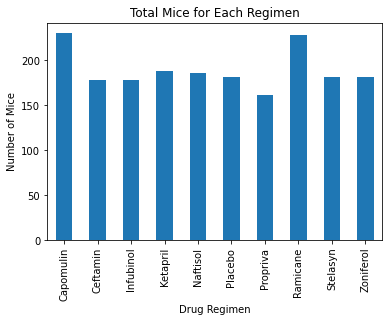

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
data_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count())["Mouse ID"]
data_bar = data_df.plot(kind="bar")
data_bar.set_xlabel("Drug Regimen")
data_bar.set_ylabel("Number of Mice")
plt.title("Total Mice for Each Regimen")
plt.show()

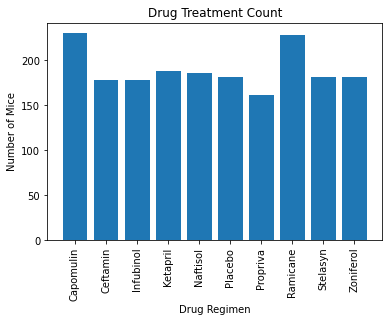

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import numpy as np
data_list = summary_stat.index.tolist()
data_count = (combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(data_count))
x_axis = data_list

plt.bar(x_axis,data_count)
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()



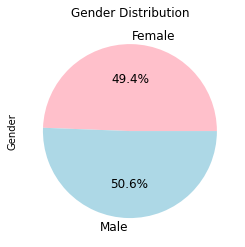

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_df.groupby(["Sex"])["Mouse ID"].count()
gender_group.plot(kind = "pie",y=["Sex"],autopct="%1.1f%%",colors=["pink","lightblue"],fontsize = 12)
plt.title("Gender Distribution")
plt.ylabel("Gender")
plt.show()

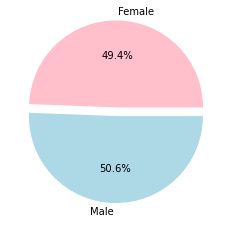

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
labels = ["Female","Male"]
colors = ["pink","lightblue"]
explode = (0.1,0)
plt.pie(gender_count,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_last = pd.DataFrame(capomulin_df.groupby("Mouse ID").max()["Timepoint"])
cap_merge = pd.merge(cap_last,combined_df,on=("Mouse ID","Timepoint"),how="left")

ram_last = pd.DataFrame(ramicane_df.groupby("Mouse ID").max()["Timepoint"])
ram_merge = pd.merge(ram_last,combined_df,on=("Mouse ID","Timepoint"),how="left")

inf_last = pd.DataFrame(infubinol_df.groupby("Mouse ID").max()["Timepoint"])
inf_merge = pd.merge(inf_last,combined_df,on=("Mouse ID","Timepoint"),how="left")

cef_last = pd.DataFrame(ceftamin_df.groupby("Mouse ID").max()["Timepoint"])
cef_merge = pd.merge(cef_last,combined_df,on=("Mouse ID","Timepoint"),how="left")

drug_merge = [cap_merge,ram_merge,inf_merge,cef_merge]
drug_data = pd.concat(drug_merge)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_list = []
for drug in drugs:
    drug_df = drug_data.loc[drug_data["Drug Regimen"] == drug]
    
    tumor_df = drug_df.loc[drug_df["Timepoint"] == drug_df["Timepoint"]]
    
    volume = tumor_df["Tumor Volume (mm3)"]
    drug_list.append(volume)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The median of {drug} is {quartiles[.5]}")
    print(f"The lower quartile of {drug} is {lowerq}")
    print(f"The upper quartile of {drug} is {upperq}")
    print(f"The interquartile of {drug} is {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
    # Determine outliers using upper and lower bounds
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    print(f"Values for {drug} above {upper_bound} could be outliers")
    print(f"Values for {drug} below {lower_bound} could be outliers")

The median of Capomulin is 38.1251644
The lower quartile of Capomulin is 32.37735684
The upper quartile of Capomulin is 40.1592203
The interquartile of Capomulin is 7.781863460000004
Values for Capomulin above 51.83201549 could be outliers
Values for Capomulin below 20.70456164999999 could be outliers
The median of Ramicane is 36.56165229
The lower quartile of Ramicane is 31.56046955
The upper quartile of Ramicane is 40.65900627
The interquartile of Ramicane is 9.098536719999998
Values for Ramicane above 54.30681135 could be outliers
Values for Ramicane below 17.912664470000003 could be outliers
The median of Infubinol is 60.16518046
The lower quartile of Infubinol is 54.04860769
The upper quartile of Infubinol is 65.52574285
The interquartile of Infubinol is 11.477135160000003
Values for Infubinol above 82.74144559000001 could be outliers
Values for Infubinol below 36.83290494999999 could be outliers
The median of Ceftamin is 59.85195552
The lower quartile of Ceftamin is 48.72207785
T

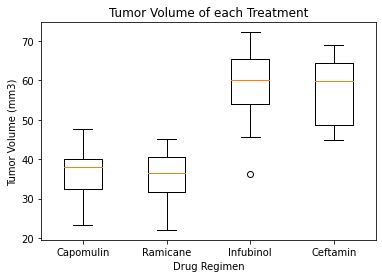

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_list,labels=drugs)
plt.title("Tumor Volume of each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

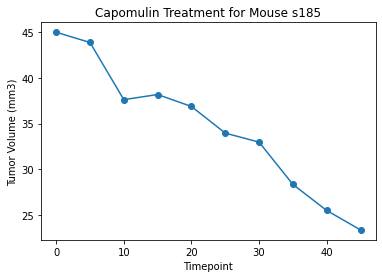

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_a_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
x_axis = cap_a_mouse["Timepoint"]
tumor = cap_a_mouse["Tumor Volume (mm3)"]

plt.plot(x_axis,tumor, marker = "o")

plt.title("Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

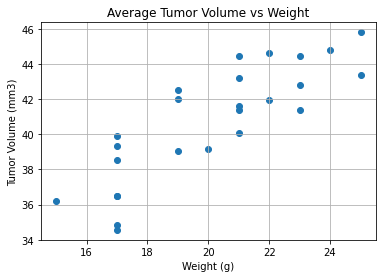

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.grid()
plt.title("Average Tumor Volume vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

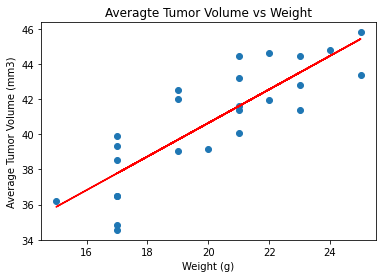

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_label = cap_avg["Weight (g)"]
y_label = cap_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label,y_label)
regress_value = x_label * slope + intercept

plt.scatter(x_label,y_label)
plt.plot(x_label,regress_value,"r-")

plt.title("Averagte Tumor Volume vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()